In [105]:
import pandas as pd
import numpy as np

In [107]:
file_path = r"C:\Users\HP\Documents\insurance.csv"

In [219]:
# Load the CSV file into a DataFrame
medical_df = pd.read_csv(file_path)

In [221]:
medical_df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [231]:
medical_df.shape

(1338, 7)

In [233]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [117]:
# We see that we do not have any null values

In [235]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Exploratory Data Analysis and Visualisation

In [237]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [239]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [241]:
# Let's Explore the variable "AGE"

In [245]:
medical_df["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

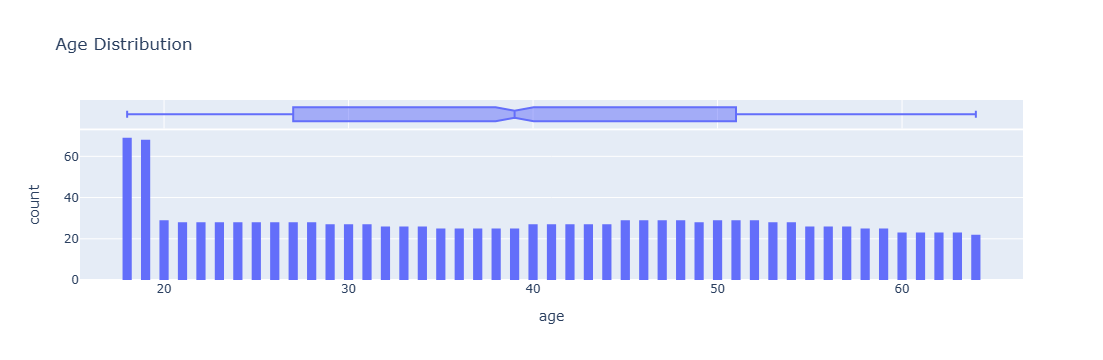

In [257]:
age_fig = px.histogram(medical_df, x="age", marginal = "box", nbins = 47, title = "Age Distribution")
age_fig.update_layout(bargap = 0.5)
age_fig.show()

In [132]:
# We se thatthe "AGE" distribution is spread out except for ages 19 and 20
# Ages 19 and 20 seems to have double the number of other ages. Wy is that?
# Insurance maybe offering a lower insurance premium if you sign up withthem once you turn 18.
# This might be an explanation for the higher number of people aged 18 and 19 

In [134]:
# Body Mass Index (BMI)

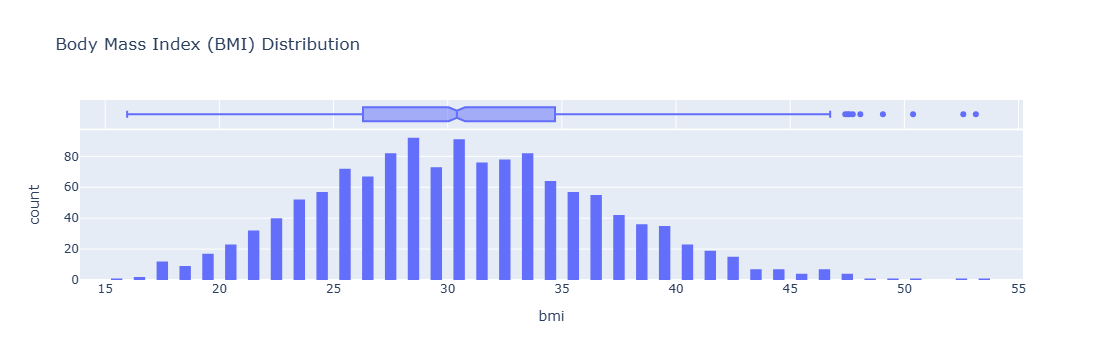

In [259]:
bmi_fig = px.histogram(medical_df, x="bmi", marginal = "box", nbins = 47, title = "Body Mass Index (BMI) Distribution")
bmi_fig.update_layout(bargap = 0.5)
bmi_fig.show()

In [137]:
 # Let's se the distribution of the charges column

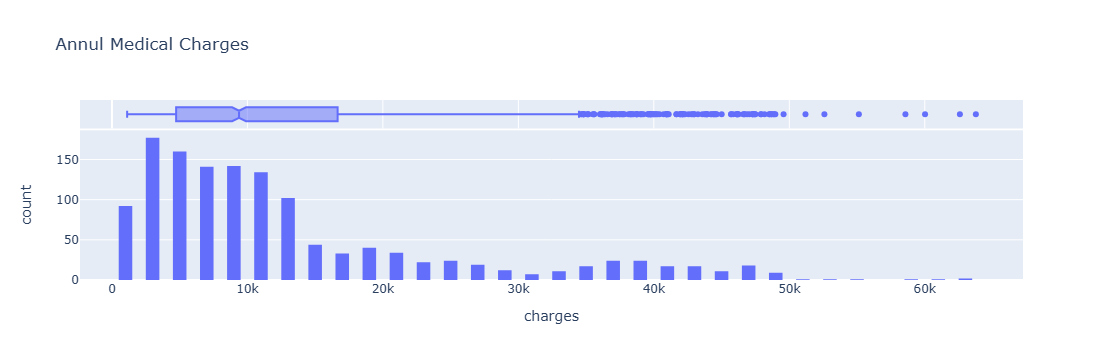

In [275]:
charges = px.histogram(medical_df, x ="charges", marginal = "box", nbins = 47, title = "Annul Medical Charges")
charges.update_layout(bargap = 0.5)
charges.show()

In [139]:
# The charges are under $10k for most customers who do not smoke

In [140]:
# Now, let's see the charges according to the smoker variable

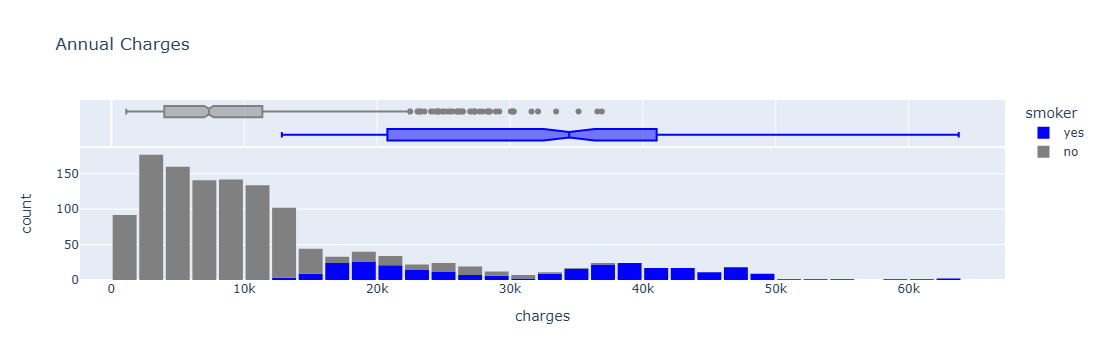

In [273]:
charges = px.histogram(medical_df, x="charges",
                       marginal = "box",
                       color = "smoker",
                       color_discrete_sequence = ['blue', 'grey'],
                       title = "Annual Charges")
charges.update_layout(bargap = 0.1)
charges.show()

In [142]:

# While most people who smoke have their annual charges under $36K
# This could mean that smoking increased the risks of sickness, hence, more medical bills

In [ ]:
# We See that most people who are smokers spend more in Annual Medical Charges
# Median price for non-smokers is around $7K while the Median price for smokers is around $35K

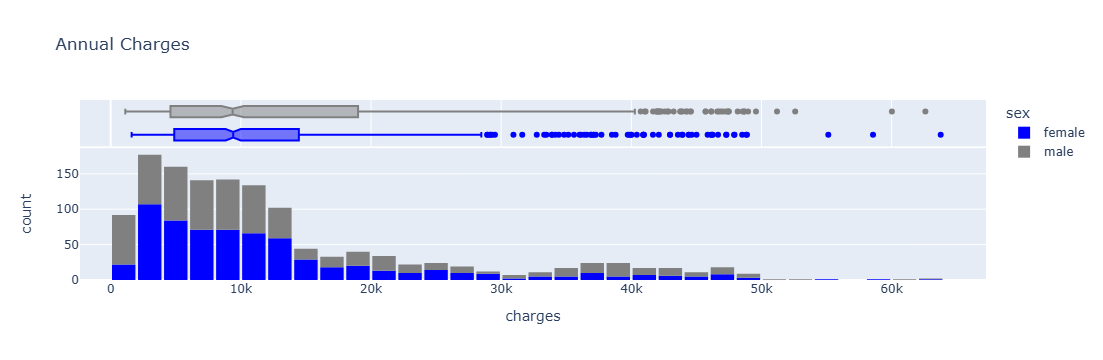

In [277]:
charges = px.histogram(medical_df, x="charges",
                       marginal = "box",
                       color = "sex",
                       color_discrete_sequence = ['blue', 'grey'],
                       title = "Annual Charges")
charges.update_layout(bargap = 0.1)
charges.show()

In [253]:
# There are no much difference between the price males and females pay annually

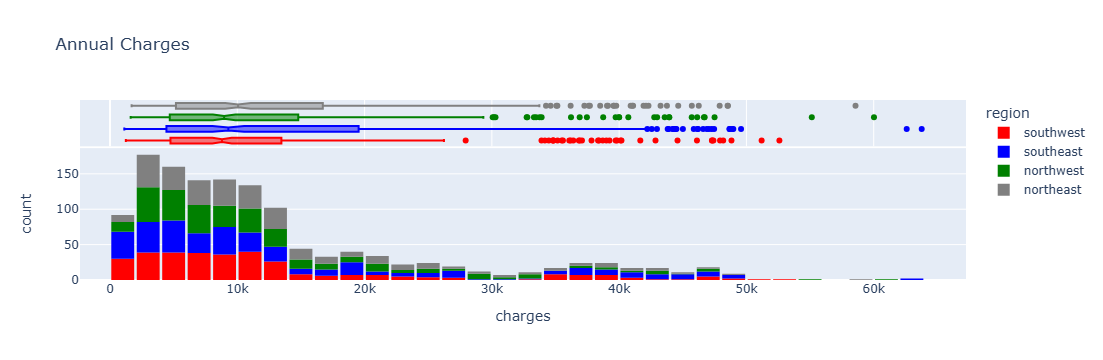

In [279]:
charges = px.histogram(medical_df, x="charges",
                       marginal = "box",
                       color = "region",
                       color_discrete_sequence = ['red', 'blue', 'green', 'grey'],
                       title = "Annual Charges")
charges.update_layout(bargap = 0.1)
charges.show()

In [148]:
# Most people from the SOuth wast spend the lowest on medical bills. (ie: $8.798k)
# Most people from North West spend the 2nd lowest ($8.965k)
# Most people from South East spend about $9.294k annually
# Then, most peopleNorth East spend over $10k annually

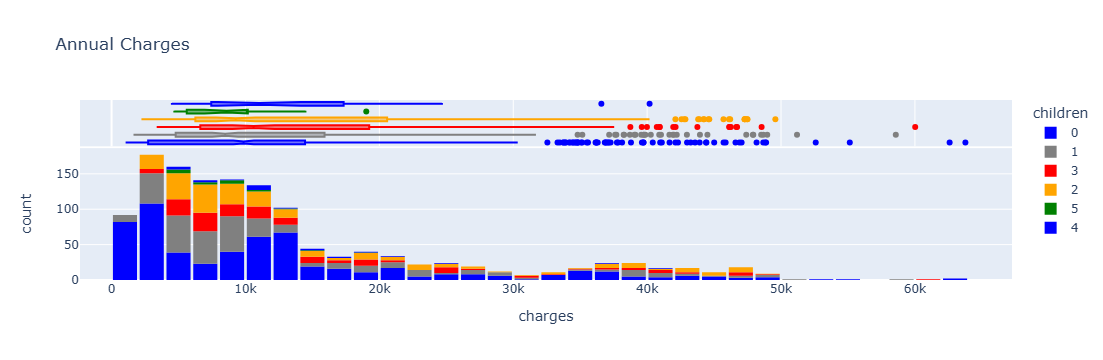

In [281]:
charges = px.histogram(medical_df, x="charges",
                       marginal = "box",
                       color = "children",
                       color_discrete_sequence = ['blue', 'grey', 'red', 'orange', 'green'],
                       title = "Annual Charges")
charges.update_layout(bargap = 0.1)
charges.show()

In [153]:
# Let us see the distribution of smokers versus non-smokers

In [283]:
medical_df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

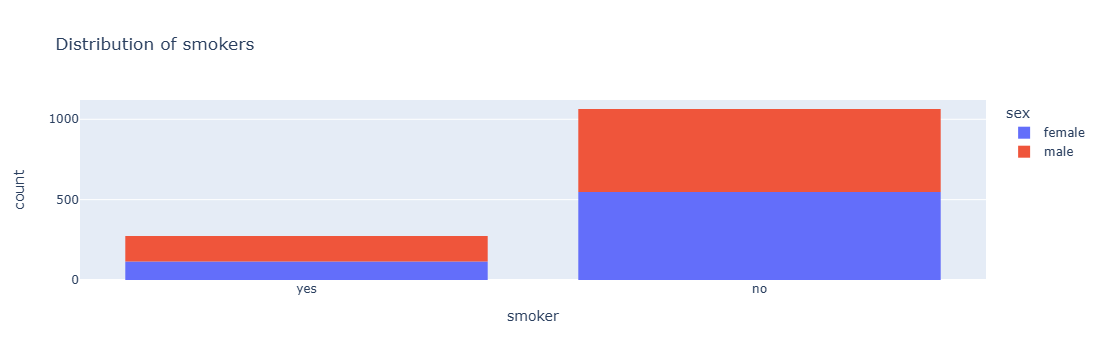

In [285]:
px.histogram(medical_df, x='smoker', color ='sex', title ="Distribution of smokers")

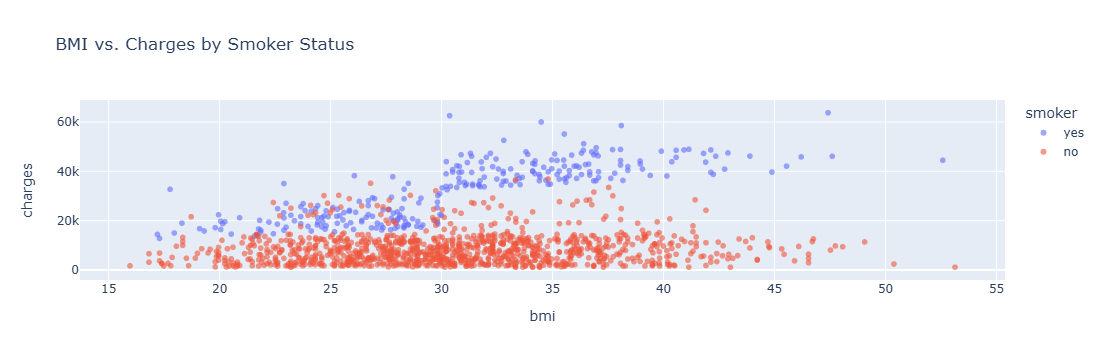

In [287]:
charges = px.scatter(medical_df, 
                     x="bmi", 
                     y="charges", 
                     color="smoker", 
                     opacity=0.6, 
                     hover_data=["sex"],
                     title="BMI vs. Charges by Smoker Status")

charges.show()

In [159]:
# We see that increased BMI doesn't really increase the annual charges in non-smokers.
# We also noticed increased annual charges for smokers with increased BMI

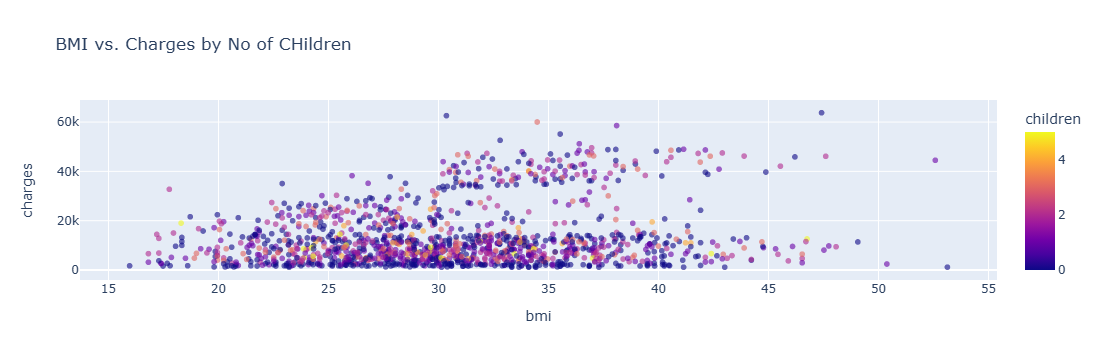

In [289]:
charges = px.scatter(medical_df, 
                     x="bmi", 
                     y="charges", 
                     color="children", 
                     opacity=0.6, 
                     hover_data=["sex"],
                     title="BMI vs. Charges by No of CHildren")

charges.show()


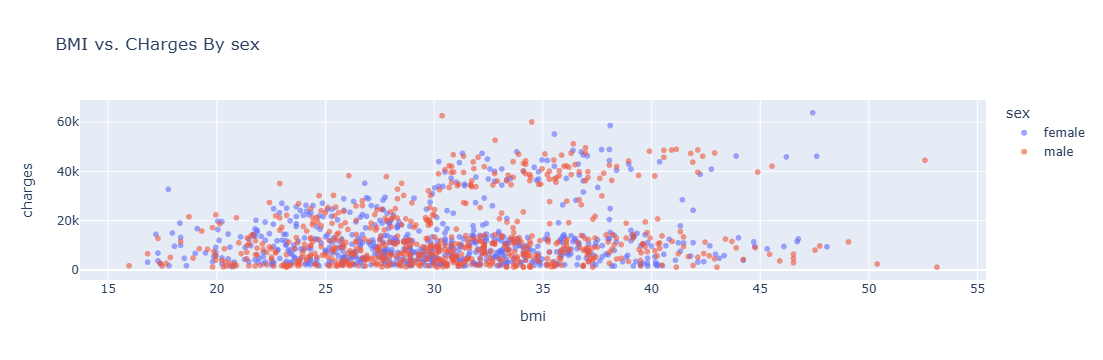

In [291]:
charges = px.scatter(medical_df, 
                     x="bmi", 
                     y="charges", 
                     color="sex", 
                     opacity=0.6, 
                     hover_data=["sex"],
                     title="BMI vs. CHarges By sex")

charges.show()


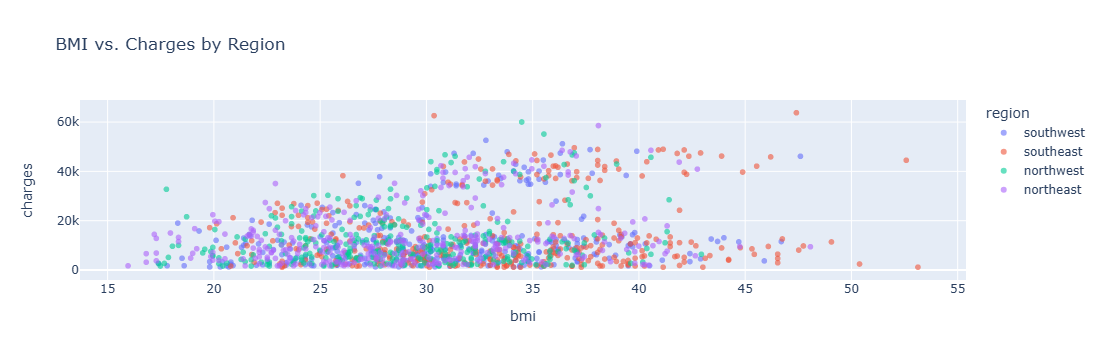

In [293]:
charges = px.scatter(medical_df, 
                     x="bmi", 
                     y="charges", 
                     color="region", 
                     opacity=0.6, 
                     hover_data=["sex"],
                     title="BMI vs. Charges by Region")

charges.show()


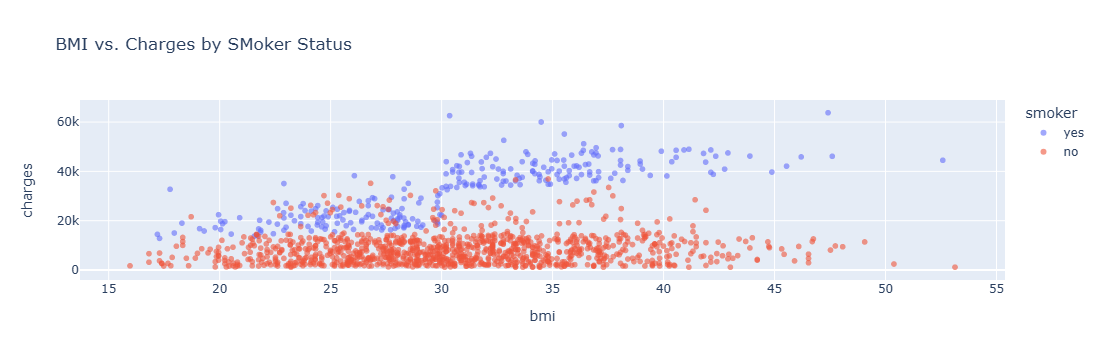

In [295]:
charges = px.scatter(medical_df, 
                     x="bmi", 
                     y="charges", 
                     color="smoker", 
                     opacity=0.6, 
                     hover_data=["sex"],
                     title="BMI vs. Charges by SMoker Status")

charges.show()


In [168]:
#  Smokers with higher BMI tend to accrue more annual medical charges

In [297]:
medical_df["charges"].corr(medical_df["age"])

0.29900819333064765

In [299]:
medical_df["charges"].corr(medical_df["bmi"])

0.19834096883362892

In [301]:
medical_df["charges"].corr(medical_df["children"])

0.06799822684790487

In [173]:
# Let's see how strong the correlation between smoking and charges is
# To do this, we convert smoker into numeric value because it is surrently a categorical variable

In [303]:
smoker_number = {'no':0, 'yes': 1}
smoker_use = medical_df.smoker.map(smoker_number)
smoker_use

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [178]:
# Now, let's compare it

In [305]:
medical_df["charges"].corr(smoker_use)

0.7872514304984772

In [180]:
# Phew!
# We see that smoking seems to have much more correlation to annual charges than other columns

In [307]:
# Exclude non-numerical columns
numeric_data = medical_df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)


               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


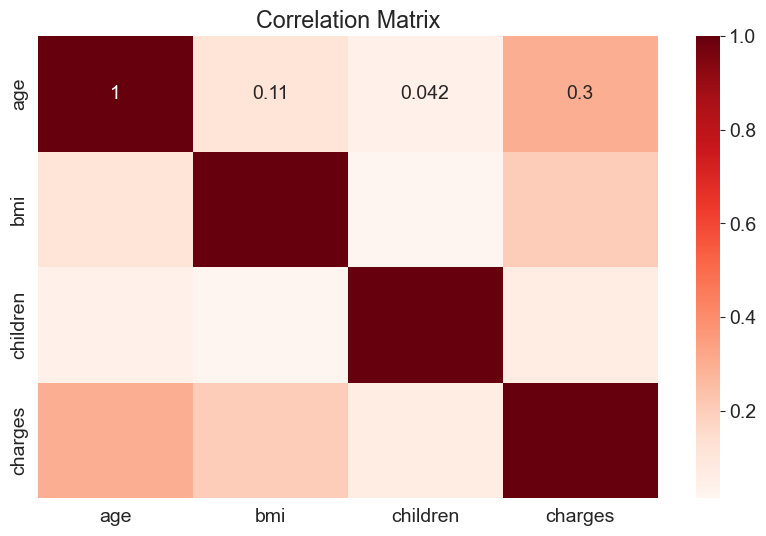

In [309]:
sns.heatmap(numeric_data.corr(), cmap="Reds", annot=True)
plt.title('Correlation Matrix');

In [183]:
# Now, let's build a Linear Regression Model

In [186]:
# We saw that smoker had a more linear correlation to charges, then followed by age

In [187]:
# Now, let's build a linear regression model using the both variables as our input variables
# Also remember that we have converted the smoker which is a categorical variable to a numeric variable

In [313]:
medical_df['smoker_use'] = smoker_use

In [315]:
from sklearn.model_selection import train_test_split

In [317]:
X = ['age', 'smoker_use']
y = ['charges']

In [319]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming X and y are properly defined earlier as lists
# Convert both X and y to NumPy arrays and flatten y
X = np.array(X)
y = np.array(y).ravel()

# Check the shapes to ensure consistency
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Shape of X: (2,)
Shape of y: (1,)


ValueError: Found input variables with inconsistent numbers of samples: [2, 1]

In [ ]:
# Let's Create Our Model

In [321]:
# Import the necessary library
from sklearn.linear_model import LinearRegression

# Create the LinearRegression model
lm = LinearRegression()

In [323]:
lm.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [193]:
coefficients = model.coef_
intercept = lm.intercept_

NameError: name 'model' is not defined

In [ ]:
coefficients

In [675]:
intercept

array([-2497.55267])

In [677]:
predictions = lm.predict(X_test)

In [681]:
predictions

array([[10069.20162117],
       [ 7555.85076293],
       [39040.7344624 ],
       [10348.46282764],
       [26473.98017123],
       [ 6997.32834999],
       [ 2808.41025294],
       [15375.1645441 ],
       [ 5321.76111117],
       [11186.24644705],
       [29545.85344241],
       [ 8952.15679529],
       [ 5601.02231764],
       [34014.03274594],
       [37923.68963652],
       [34293.29395241],
       [11186.24644705],
       [34293.29395241],
       [10348.46282764],
       [33176.24912652],
       [ 4483.97749176],
       [ 9510.67920823],
       [ 2808.41025294],
       [ 3646.19387235],
       [11465.50765352],
       [12582.5524794 ],
       [14258.11971822],
       [ 5042.4999047 ],
       [10627.72403411],
       [ 2529.14904647],
       [ 8672.89558882],
       [13420.33609881],
       [ 3366.93266588],
       [ 5880.28352411],
       [ 4763.23869823],
       [10069.20162117],
       [ 3366.93266588],
       [ 9510.67920823],
       [35689.59998476],
       [31221.42068123],


In [685]:
residuals = y_test - predictions

In [687]:
residuals

array([[  -974.13337117,  -4797.02582117,  19261.78152883, ...,
         -7868.37077117,   1294.08157883,  -8104.42162117],
       [  1539.21748707,  -2283.67496293,  21775.13238707, ...,
         -5355.01991293,   3807.43243707,  -5591.07076293],
       [-29945.6662124 , -33768.5586624 ,  -9709.7513124 , ...,
        -36839.9036124 , -27677.4512624 , -37075.9544624 ],
       ...,
       [  6565.91920353,   2743.02675353,  26801.83410353, ...,
          -328.31819647,   8834.13415353,   -564.36904647],
       [ -4604.52905528,  -8427.42150528,  15631.38584472, ...,
        -11498.76645528,  -2336.31410528, -11734.81730528],
       [  6007.39679059,   2184.50434059,  26243.31169059, ...,
          -886.84060941,   8275.61174059,  -1122.89145941]])

In [691]:
import numpy as np
def rmse(y, predictions):
    return np.sqrt(np.mean(np.square(y_test - predictions)))

In [693]:
loss= rmse( y_test, predictions)
print('Loss:', loss)

Loss: 15876.130128513354


In [ ]:
# Let's reshape our dataframe so it can be one-dimensional

In [601]:
import numpy as np

# Assuming y_pred and y_test are Pandas DataFrame columns or Series
# Convert them to NumPy arrays
y_pred = np.array(y_pred).ravel()
y_test = np.array(y_test).ravel()

# Check dimensions after reshaping
print(y_pred.shape)
print(y_test.shape)

(1,)
(402,)


In [603]:
print("Length of y_pred:", len(y_pred))
print("Length of y_test:", len(y_test))

Length of y_pred: 1
Length of y_test: 402


Length of y_pred before conversion: 402
Length of y_test before conversion: 402
Shape of X_test: (402, 2)
Shape of y_test: (402,)
Length of y_pred after conversion: 402
Length of y_test after conversion: 402


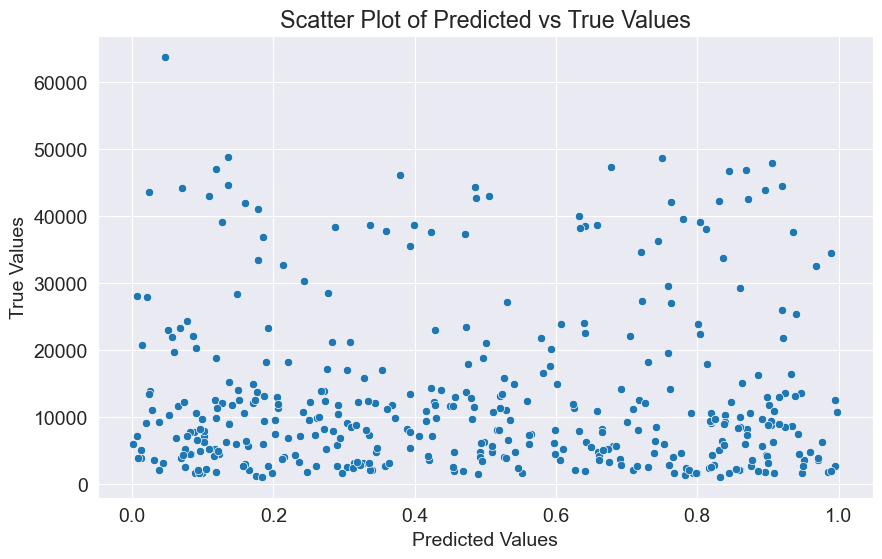

In [637]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_pred and y_test are properly defined and aligned
# Print lengths to diagnose the issue
print("Length of y_pred before conversion:", len(y_pred))
print("Length of y_test before conversion:", len(y_test))

# Check shapes of X_test and y_test
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

# Ensure y_pred is generated correctly (example, replace with actual prediction logic)
# Example: y_pred = model.predict(X_test)
# Ensure y_pred has the same number of elements as y_test
y_pred = np.random.rand(len(y_test))  # Example random predictions

# Convert y_pred and y_test to NumPy arrays and flatten
y_pred = np.array(y_pred).ravel()
y_test = np.array(y_test).ravel()

# Print lengths after conversion
print("Length of y_pred after conversion:", len(y_pred))
print("Length of y_test after conversion:", len(y_test))

# Check lengths to diagnose the issue
if len(y_pred) != len(y_test):
    raise ValueError("Lengths of y_pred and y_test must be the same for plotting.")

# Plot using seaborn scatterplot
sns.scatterplot(x=y_pred, y=y_test)

# Add labels and title using matplotlib
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title('Scatter Plot of Predicted vs True Values')

# Show the plot
plt.show()

In [609]:
model.predict([[34, 0]])

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[6997.32834999]])

In [611]:
import numpy as np
def rmse(y, predictions):
    return np.sqrt(np.mean(np.square(y_test - predictions)))


In [649]:
loss= rmse( y_test, y_pred)
print('Loss:', loss)

Loss: 17778.08828337703


In [647]:
import pandas as pd
import numpy as np

# Example data (replace with your actual data)
X = np.array(['age', 'smoker_use'])  # Features
model_coefs = np.array([279.26120647, 23665.5699183])  # Example coefficients (replace with your model.coef_)
model_intercept = -2497.55267  # Example intercept (replace with your model.intercept_)

# Append the intercept to the coefficients array
coefs_with_intercept = np.append(model_coefs, model_intercept)

# Create a DataFrame for feature weights
weights_df = pd.DataFrame({
    'feature': np.append(X, 'intercept'),  # Append 'intercept' as a feature name
    'weight': coefs_with_intercept
})

print(weights_df)

      feature        weight
0         age    279.261206
1  smoker_use  23665.569918
2   intercept  -2497.552670


In [ ]:
# This means that smoker_use has more importance in our model than age.